In [1]:
import cv2
import tensorflow
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras.preprocessing import image
from keras.regularizers import l2
import os
import matplotlib.pyplot as plt
import random
import shutil
import numpy as np

In [2]:
Dataset = r"C:\Users\Teja Nikhil\OneDrive\Desktop\COVID-19_Radiography_Dataset\covid_direc"

In [3]:
Dataset_covid = r"C:\Users\Teja Nikhil\OneDrive\Desktop\COVID-19_Radiography_Dataset\covid_direc\COVID"
covid_images = os.listdir(Dataset_covid)
len(covid_images)

3611

In [4]:
Dataset_normal = r"C:\Users\Teja Nikhil\OneDrive\Desktop\COVID-19_Radiography_Dataset\Normal"
normal_images = os.listdir(Dataset_normal)
len(normal_images)

10192

### Scaling down the normal image dataset

In [5]:
random.shuffle(normal_images)
target_dir = r"C:\Users\Teja Nikhil\OneDrive\Desktop\COVID-19_Radiography_Dataset\covid_direc\Normal_1"

In [35]:
src_dir = Dataset_normal
for index,i in enumerate(normal_images):
    directory = os.path.join(src_dir, i)
    shutil.copy(directory, target_dir)
    if(index==3616):
        break

In [ ]:
len(os.listdir(target_dir))

### Reading all the images using image datagenerator

In [5]:
train_datagen = image.ImageDataGenerator(rescale = 1./255,
                                                                    #width_shift_range = 0.2,
                                                                    #brightness_range = [0.2,1],
                                                                    #horizontal_flip = True,
                                                                    #zoom_range = 0.2,
                                                                    validation_split=0.2)

train_data = train_datagen.flow_from_directory(Dataset,
                                                                            subset = 'training',
                                                                            class_mode = 'binary',
                                                                            target_size = (224, 224) 
                                                                            )

validation_data =  train_datagen.flow_from_directory(Dataset,
                                                                                     subset = 'validation',
                                                                                     class_mode = 'binary',
                                                                                     target_size = (224, 224)
                                                                                     )

Found 5779 images belonging to 2 classes.
Found 1444 images belonging to 2 classes.


In [6]:
train_data.class_indices

{'COVID': 0, 'Normal_1': 1}

### Creating model Architecture

**Unfortunately, there is no magical formula to determine the right size or architecture of your model (in terms of the number of layers, or the right size for each layer). You will have to experiment using a series of different architectures.**

In [10]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### Plotting the model

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 54, 54, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 27, 27, 128)      0

### Model training

In [61]:
learning_rate = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.2, patience=5, min_lr=0.001)

In [ ]:
history = model.fit(train_data, validation_data = validation_data, epochs = 30, batch_size = 32, steps_per_epoch = 10)

In [32]:
model_json = model.to_json()
with open("covid_cnn1.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("covid_cnn1.h5")

### Loading Model Weights

In [11]:
model.load_weights("covid_cnn1.h5")

### Model Testing

In [12]:
def read_img(img_path):
    image = cv2.imread(img_path)
    resized_image = cv2.resize(image, (224,224), interpolation = cv2.INTER_AREA)
    return resized_image

test_image1 = read_img(r"C:\Users\Teja Nikhil\OneDrive\Desktop\Test1.png")
print(f"Shape of the image: {test_image1.shape}")

test_image1 = test_image1[np.newaxis,:,:,:]
model.predict(test_image1)

Shape of the image: (224, 224, 3)


array([[0.]], dtype=float32)

In [10]:
Test_Dir = r"C:\Users\Teja Nikhil\Semester - III\Covid Diagnostics_ICS Endsem\Train CXR\Positive CXR"
Testing_Images = os.listdir(Test_Dir)
Predictions = []
for i in Testing_Images:
    direc = os.path.join(Test_Dir, i)
    test_image = read_img(direc)
    test_image = test_image[np.newaxis,:,:,:]
    Predictions.append(list(model.predict(test_image)))

Predictions

[[array([0.], dtype=float32)],
 [array([0.], dtype=float32)],
 [array([0.], dtype=float32)],
 [array([0.], dtype=float32)],
 [array([0.], dtype=float32)],
 [array([0.], dtype=float32)],
 [array([0.], dtype=float32)],
 [array([0.], dtype=float32)],
 [array([0.], dtype=float32)],
 [array([0.], dtype=float32)],
 [array([0.], dtype=float32)],
 [array([0.], dtype=float32)],
 [array([3.694413e-34], dtype=float32)],
 [array([0.], dtype=float32)],
 [array([0.], dtype=float32)],
 [array([0.], dtype=float32)],
 [array([0.], dtype=float32)],
 [array([0.], dtype=float32)],
 [array([0.], dtype=float32)],
 [array([0.], dtype=float32)],
 [array([0.], dtype=float32)],
 [array([0.], dtype=float32)],
 [array([1.], dtype=float32)],
 [array([0.], dtype=float32)],
 [array([0.], dtype=float32)],
 [array([1.], dtype=float32)],
 [array([1.], dtype=float32)],
 [array([0.], dtype=float32)],
 [array([0.], dtype=float32)],
 [array([1.], dtype=float32)],
 [array([0.], dtype=float32)],
 [array([0.], dtype=float32)]

In [11]:
Predictions[0]

[array([0.], dtype=float32)]

In [12]:
Test_Dir = r"C:\Users\Teja Nikhil\Semester - III\Covid Diagnostics_ICS Endsem\Train CXR\Negative CXR"
Testing_Images = os.listdir(Test_Dir)
Predictions = []
for i in Testing_Images:
    direc = os.path.join(Test_Dir, i)
    test_image = read_img(direc)
    test_image = test_image[np.newaxis,:,:,:]
    Predictions.append(list(model.predict(test_image)))
    
list(Predictions)

[[array([1.], dtype=float32)],
 [array([1.], dtype=float32)],
 [array([1.], dtype=float32)],
 [array([1.], dtype=float32)],
 [array([1.], dtype=float32)],
 [array([1.], dtype=float32)],
 [array([1.], dtype=float32)],
 [array([1.], dtype=float32)],
 [array([1.], dtype=float32)],
 [array([0.], dtype=float32)],
 [array([1.], dtype=float32)],
 [array([1.], dtype=float32)],
 [array([1.], dtype=float32)],
 [array([1.], dtype=float32)],
 [array([1.], dtype=float32)],
 [array([1.], dtype=float32)],
 [array([1.], dtype=float32)],
 [array([1.], dtype=float32)],
 [array([1.], dtype=float32)],
 [array([1.], dtype=float32)],
 [array([1.], dtype=float32)],
 [array([1.], dtype=float32)],
 [array([1.], dtype=float32)],
 [array([1.], dtype=float32)],
 [array([1.], dtype=float32)],
 [array([1.], dtype=float32)],
 [array([1.], dtype=float32)],
 [array([1.], dtype=float32)],
 [array([1.], dtype=float32)],
 [array([1.], dtype=float32)],
 [array([0.], dtype=float32)],
 [array([1.], dtype=float32)],
 [array(

In [13]:
import lime
from lime import lime_image
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt
import random
import numpy as np

### Applying Lime Explainability to the cnn model

* **Image Reading**
* **Generating Super pixels**
* **Generating Perturbations**
* **Making predictions**
* **Compute distance and weights**
* **Fitting a Linear regression**
* **Generating the mask**

In [15]:
from tensorflow.keras.applications.imagenet_utils import decode_predictions
import skimage.io 
import skimage.segmentation
import copy
import sklearn
import sklearn.metrics
import pandas as pd
from sklearn.linear_model import LinearRegression
import warnings
import urllib
warnings.filterwarnings("ignore")
print('Notebook running: keras ', tensorflow.keras.__version__)
np.random.seed(222)

Notebook running: keras  2.7.0


In [16]:
def readImage(Image_Path):
    image = cv2.imread(Image_Path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = skimage.transform.resize(image, (224 ,224)) 
    return image

def draw_Img(img, title = "Image"):
    plt.imshow(img)
    plt.axis('off')
    plt.style.use('seaborn')
    plt.title(title+str(img.shape))
    skimage.io.imshow(Image) 
    plt.show()

def Generate_Superpixels(Image, pixel_dist):
    superpixels = skimage.segmentation.quickshift(Image, kernel_size = 3, max_dist = pixel_dist, ratio = 0.2)
    num_superpixels = np.unique(superpixels).shape[0]
    print(f"Number of Super pixels generated: {num_superpixels}")
    return num_superpixels, superpixels

def Generate_Perturbations(num_perturbations):
    perturbations = np.random.binomial(1, 0.5, size=(num_perturbations, num_superpixels))
    # each row represnt each perturbation 
    # each column represent the super pixels
    print(f"Changes in the superpixels in each perturbations are: {len(perturbations[0])}")
    print(f"Number of perturbations: {len(perturbations)}")
    return perturbations

def perturb_Image(img, perturbation, segments):
    active_pixels = np.where(perturbation == 1)[0]
    mask = np.zeros(segments.shape)
    for active in active_pixels:
        mask[segments == active] = 1 
    perturbed_image = copy.deepcopy(img)
    perturbed_image = perturbed_image*mask[:,:,np.newaxis]
    return perturbed_image

def Compute_Distances(num_superpixels, perturbations):
    original_image = np.ones(num_superpixels)[np.newaxis,:] #Perturbation with all superpixels enabled 
    distances = sklearn.metrics.pairwise_distances(perturbations,original_image, metric='cosine').ravel()
    distances.shape
    return distances


def Compute_weights(distances, kernel_width):
    weights = np.sqrt(np.exp(-(distances**2)/kernel_width**2)) #Kernel function
    return weights

def fit_weights(perturbations, predictions, weights):
    simpler_model = LinearRegression()
    simpler_model.fit(X=perturbations, y=predictions[:,:,0], sample_weight=weights)
    coeff = simpler_model.coef_[0]
    return coeff

def mask_image(Image, num_superpixels, super_pixels, num_top_features, coeff):
    top_features = np.argsort(coeff)[-num_top_features:] 
    mask = np.zeros(num_superpixels) 
    mask[top_features]= True #Activate top superpixels
    skimage.io.imshow(perturb_Image(Image,mask,super_pixels))

def url_to_image(url):
    resp = urllib.request.urlopen(url)
    image = np.asarray(bytearray(resp.read()), dtype="uint8")
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)
    return image

#### Image Reading

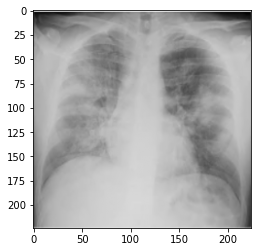

In [23]:
# Image_Path =  r"C:\Users\Teja Nikhil\OneDrive\Desktop\COVID-19_Radiography_Dataset\Testing\COVID-22.png"
Image_Path = r"C:\Users\Teja Nikhil\OneDrive\Desktop\Test1.png"
Image = readImage(Image_Path)
plt.imshow(Image)

In [24]:
model.predict(Image[np.newaxis,:,:,:])

array([[0.08401611]], dtype=float32)

In [25]:
# url = 
# Image = url_to_image(url)
# Image = cv2.resize(Image, (150,150))
# plt.imshow(Image)

#### Generating Superpixels

Number of Super pixels generated: 64


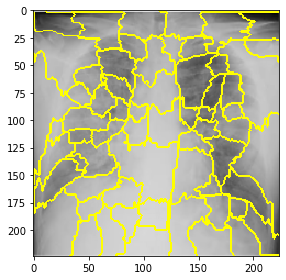

In [26]:
# draw_Img(Image)
num_superpixels , super_pixels = Generate_Superpixels(Image, 200)
skimage.io.imshow(skimage.segmentation.mark_boundaries(Image, super_pixels))

#### Generating Perturbations

Changes in the superpixels in each perturbations are: 64
Number of perturbations: 150


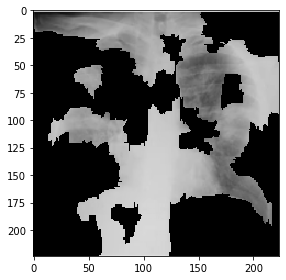

In [27]:
perturbations = Generate_Perturbations(150)
skimage.io.imshow(perturb_Image(Image, perturbations[0],super_pixels))

In [28]:
Perturbated_Df = pd.DataFrame(perturbations.flatten())
Perturbated_Df.shape
predictions = []

#### Making Predictions

In [29]:
for pert in perturbations:
    perturbed_img = perturb_Image(Image,pert,super_pixels)
    pred = model.predict(perturbed_img[np.newaxis,:,:,:])
    predictions.append(pred)

In [30]:
predictions = np.array(predictions)

#### Compute distances and weights

In [31]:
distances = Compute_Distances(num_superpixels, perturbations)

In [32]:
weights = Compute_weights(distances, 0.25)

#### Linear regression using predictions and weights

In [33]:
coeffs = fit_weights(perturbations, predictions, weights)

#### Plotting the masked image

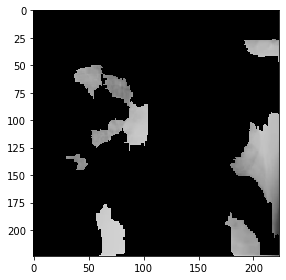

In [35]:
mask_image(Image, num_superpixels, super_pixels, 10, coeffs)

In [42]:
(coeffs)

array([-0.07444535, -0.07922529,  0.05257064, -0.01920261, -0.00662521,
        0.00032139,  0.00581933, -0.01566385,  0.02732145,  0.05551688,
        0.0359863 , -0.0106914 , -0.03633748,  0.00609617, -0.05211183,
        0.10056367, -0.0541527 ,  0.09035607,  0.00718098, -0.05871385,
       -0.05431046, -0.06508323, -0.05691586, -0.00943613, -0.01107341,
        0.06278585, -0.0152855 , -0.03872242, -0.00141923,  0.02507617,
       -0.00740246,  0.05318433,  0.01031071, -0.0011287 ,  0.1286379 ,
       -0.00504016,  0.06608562, -0.02740998,  0.12430826, -0.02982788,
       -0.04057063, -0.00612056,  0.065647  , -0.02407687, -0.08521881,
        0.013704  , -0.03920693, -0.09822491, -0.02573204, -0.03551653,
       -0.01929253, -0.00258193, -0.00148438,  0.0283506 ,  0.04596614,
       -0.061817  , -0.05338613,  0.00614983, -0.024224  ,  0.09589174,
       -0.05149663, -0.06723924, -0.01705775,  0.05330035])

In [37]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
def Preprocess_Data(Img):
    Image = cv2.resize(Img, (224, 224), interpolation=cv2.INTER_CUBIC)
    return Image

def Lime_Explain(Img, Model):
    explainer = lime_image.LimeImageExplainer(random_state=42)
    explanation = explainer.explain_instance(
          Img.astype('float'), 
          Model.predict
    )
    image1, mask = explanation.get_image_and_mask(
          Model.predict(Img.reshape(-1,224,224,3)).argmax(axis=1)[0],
          positive_only=True, 
          num_features = 5,
          hide_rest=True)
    image2, heatmap = explanation.get_image_and_mask(
          explanation.top_labels[0], 
          positive_only=False, 
          num_features=10, 
          hide_rest=False)
  
    return image1, mask, image2, heatmap

def predict_plot(Img, Model):
    Image = Preprocess_Data(Img)
    image1, masked, image2, heatmap = Lime_Explain(Image, model)
    print(Model.predict(Image.reshape(-1,224,224,3)))
    fig = plt.figure(figsize=(10, 7))
    fig.add_subplot(1, 3, 1)
    plt.imshow(Image)
    plt.axis('on')
    plt.title("Original Image")

    fig.add_subplot(1, 3, 2)
    plt.imshow(mark_boundaries(image1, masked))
    plt.axis('on')
    plt.title("Masked image")
    
  # fig.add_subplot(1, 3, 3)
  # plt.imshow(Image)
  # plt.axis('on')
  # plt.title("Original Image")

    fig.add_subplot(1, 3, 3)
    plt.imshow(mark_boundaries(image2, heatmap))
    plt.axis('on')
    plt.title("Masked heatmap")


[[0.08401611]]


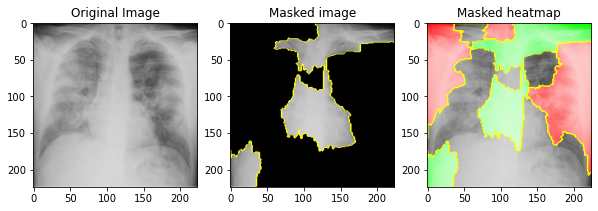

In [38]:
predict_plot(Image, model)

In [32]:
def generate_predictions(Image):
    prediction = model.predict(Image[np.newaxis,:,:,:])
    if(prediction < 0.5):
        print("Covid detected")
    else:
        print("Non covid")

In [33]:
generate_predictions(Image)

Covid detected


In [74]:
from gradcam import GradCAM
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.models import load_model
import numpy as np
import cv2


# construct the argument parser and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-i", "--image", required=True,
#     help="path to the input image")
# ap.add_argument("-m", "--model", type=str, default="vgg",
#     #choices=("vgg", "resnet"),
#     help="model to be used")
# args = vars(ap.parse_args())


# initialize the model to be VGG16
Model = model
# # check to see if we are using ResNet
# if args["model"] == "resnet":
#     Model = ResNet50
# # load the pre-trained CNN from disk
# print("[INFO] loading model...")
# model = Model(weights="imagenet")

# load the original image from disk (in OpenCV format) and then
# resize the image to its target dimensions
Image_Path = r"C:\Users\Teja Nikhil\OneDrive\Desktop\COVID-19_Radiography_Dataset\covid_direc\COVID\COVID-8.png"
Image = readImage(Image_Path)
# orig = cv2.imread(args["image"])
resized = cv2.resize(Image, (224, 224))
# load the input image from disk (in Keras/TensorFlow format) and
# preprocess it
# image = imagenet_utils.preprocess_input(image)
test_image1 = Image[np.newaxis,:,:,:]
preds = model.predict(test_image1)
# use the network to make predictions on the input image and find
# the class label index with the largest corresponding probability
i = np.argmax(preds[0])
# decode the ImageNet predictions to obtain the human-readable label
# decoded = imagenet_utils.decode_predictions(preds)
# (imagenetID, label, prob) = decoded[0][0]
# label = "{}: {:.2f}%".format(label, prob * 100)
# print("[INFO] {}".format(label))

i

0

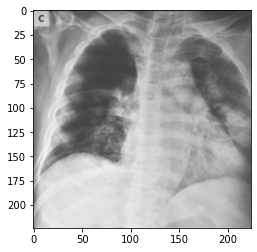

In [78]:
plt.imshow(Image)

In [75]:
# initialize our gradient class activation map and build the heatmap
cam = GradCAM(model, i)
heatmap = cam.compute_heatmap(test_image1)

In [76]:
# resize the resulting heatmap to the original input image dimensions
# and then overlay heatmap on top of the image
heatmap = cv2.resize(heatmap, (Image.shape[1], Image.shape[0]))
heatmap

array([[254, 254, 254, ...,   4,   4,   4],
       [254, 254, 254, ...,   4,   4,   4],
       [254, 254, 254, ...,   4,   4,   4],
       ...,
       [140, 140, 140, ...,  13,  13,  13],
       [140, 140, 140, ...,  13,  13,  13],
       [140, 140, 140, ...,  13,  13,  13]], dtype=uint8)

In [1]:
plt.imshow(heatmap, cmap = "gray")

NameError: name 'plt' is not defined

In [68]:
heatmap = cam.overlay_heatmap(heatmap, Image, alpha=0.5)

error: OpenCV(4.5.4) D:\a\opencv-python\opencv-python\opencv\modules\core\src\arithm.cpp:674: error: (-5:Bad argument) When the input arrays in add/subtract/multiply/divide functions have different types, the output array type must be explicitly specified in function 'cv::arithm_op'


In [79]:
cv2.rectangle(output, (0, 0), (340, 40), (0, 0, 0), -1)
cv2.putText(output, label, (10, 25), cv2.FONT_HERSHEY_SIMPLEX,
    0.8, (255, 255, 255), 2)
# display the original image and resulting heatmap and output image
# to our screen
output = np.vstack([Image, heatmap, output])
cv2.imshow("Output", output)
cv2.waitKey(0)

NameError: name 'output' is not defined